
# Primeira CNN com Keras

Neste notebook, vamos implementar nossa **primeira Rede Neural Convolucional (CNN)**.  
No **Vídeo Teórico Deep Learning e CNNs** vimos que CNNs resolvem o problema de escalabilidade das redes densas em imagens, reutilizando filtros que detectam **padrões locais** (bordas, texturas, formas).

Aqui vamos aplicar uma CNN simples no dataset **CIFAR-10**, que contém 60.000 imagens coloridas em 10 classes (avião, carro, gato, cachorro, etc.).


## 1. Importando bibliotecas

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## 2. Carregando e explorando o dataset CIFAR-10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Formato do treino: (50000, 32, 32, 3)
Formato do teste: (10000, 32, 32, 3)


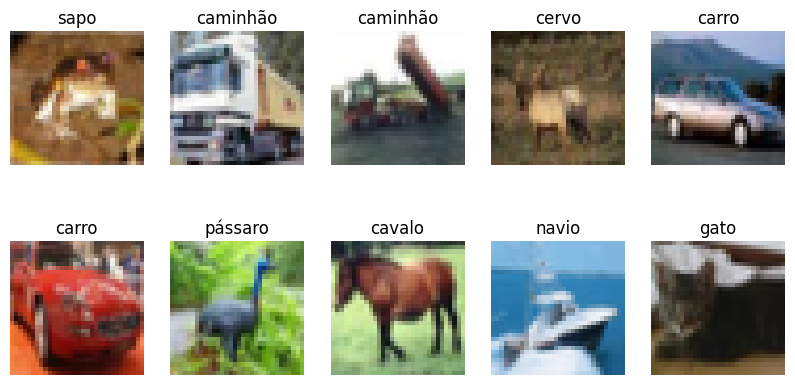

In [3]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ["avião", "carro", "pássaro", "gato", "cervo",
               "cachorro", "sapo", "cavalo", "navio", "caminhão"]

print("Formato do treino:", x_train.shape)
print("Formato do teste:", x_test.shape)

# Mostrar algumas imagens
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


## 3. Pré-processamento dos dados

In [4]:

# Normalizar valores de pixels (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Labels já estão no formato inteiro (0-9)
y_train = y_train.flatten()
y_test = y_test.flatten()


## 4. Construindo a CNN

In [5]:

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Treinando a CNN

In [6]:

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 82ms/step - accuracy: 0.3247 - loss: 1.8287 - val_accuracy: 0.5118 - val_loss: 1.3491
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.5329 - loss: 1.2958 - val_accuracy: 0.5494 - val_loss: 1.2390
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.5994 - loss: 1.1266 - val_accuracy: 0.6366 - val_loss: 1.0414
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6400 - loss: 1.0180 - val_accuracy: 0.6646 - val_loss: 0.9693
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.6763 - loss: 0.9207 - val_accuracy: 0.6918 - val_loss: 0.8983


## 6. Avaliando no conjunto de teste

In [7]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Acurácia no teste: {test_acc*100:.2f}%")


313/313 - 4s - 11ms/step - accuracy: 0.6741 - loss: 0.9294
Acurácia no teste: 67.41%


## 7. Visualizando os filtros aprendidos

Formato dos filtros: (3, 3, 3, 32)


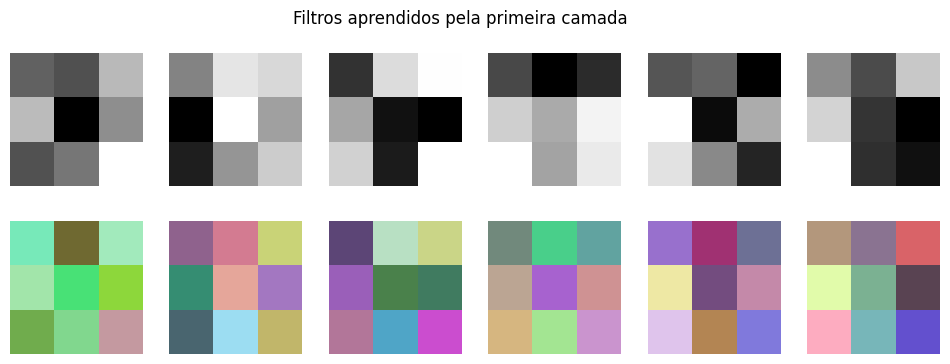

In [8]:

# Obter pesos da primeira camada convolucional
filters, biases = model.layers[0].get_weights()
print("Formato dos filtros:", filters.shape)

# Normalizar para visualização
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6
plt.figure(figsize=(12,4))
for i in range(n_filters):
    f = filters[:,:,:,i]
    plt.subplot(2, n_filters, i+1)
    plt.imshow(f[:,:,0], cmap="gray")
    plt.axis("off")
    plt.subplot(2, n_filters, i+1+n_filters)
    plt.imshow(f)
    plt.axis("off")
plt.suptitle("Filtros aprendidos pela primeira camada")
plt.show()



## 8. Conexão com a teoria

- CNNs reduzem drasticamente o número de parâmetros necessários para aprender com imagens.  
- Os **filtros convolucionais** detectam **padrões locais** (bordas, texturas, partes de objetos).  
- Essas representações são **reutilizáveis**: um filtro que detecta "bordas" pode ser útil em várias imagens.  
- Hoje, CNNs são a base de aplicações em visão computacional: desde carros autônomos até diagnósticos médicos por imagem.
